# Identificação de Alzaimer em imagens RX

* Mohammad Reza Tabrizi

### As funções seguintes apresentam 3 configurações de redes neuronais CNN, a testar nas secções seguintes:

In [ ]:
def build_model_CNN1(filters, kernel_size,dropout,labels):
  model = models.Sequential()
  model.add(layers.Conv2D(filters, (kernel_size, kernel_size), activation='relu', input_shape=(200, 200, 1)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(filters, (kernel_size, kernel_size), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(filters, (kernel_size, kernel_size), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))

  model.add(layers.Flatten())
  model.add(layers.Dropout(dropout))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(16, activation='relu'))
  model.add(layers.Dense(labels, activation='softmax'))
  model.compile(optimizers.Adam(lr=0.00001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
  return model

In [ ]:
def build_model_CNN3(labels):
  #construct CNN structure
  model = Sequential()  
  #1st convolution layer
  model.add(Conv2D(64, (5, 5), activation='relu', input_shape=(200,200,1)))
  model.add(MaxPooling2D(pool_size=(5,5), strides=(2, 2)))
  #2nd convolution layer
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))
  #3rd convolution layer
  model.add(Conv2D(128, (3, 3), activation='relu'))
  model.add(Conv2D(128, (3, 3), activation='relu'))
  model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))
  
  model.add(Flatten())
  #fully connected neural networks
  model.add(Dense(1024, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(1024, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(labels, activation='softmax'))
  model.compile(optimizers.Adam(lr=0.00001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
  return model

In [ ]:
def build_model_CNN_API_2(labels):
  visible = Input(shape=(200,200,1))
  # first feature extractor
  conv1 = Conv2D(64, kernel_size=4, activation='relu')(visible)
  pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
  conv2 = Conv2D(64, kernel_size=4, activation='relu')(pool1)
  pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
  conv3 = Conv2D(64, kernel_size=4, activation='relu')(pool2)
  pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
  flat1 = Flatten()(pool3)
  # second feature extractor

  conv2_1 = Conv2D(32, kernel_size=4, activation='relu')(visible)
  pool2_1 = AveragePooling2D(pool_size=(2, 2))(conv2_1)
  conv2_2 = Conv2D(32, kernel_size=4, activation='relu')(pool2_1)
  pool2_2 = AveragePooling2D(pool_size=(2, 2))(conv2_2)
  conv2_3 = Conv2D(32, kernel_size=4, activation='relu')(pool2_2)
  pool2_2 = AveragePooling2D(pool_size=(2, 2))(conv2_3)
  flat2 = Flatten()(pool2_2)
  # merge feature extractors
  merge = concatenate([flat1, flat2])
  # interpretation layer
  hidden1 = Dense(128, activation='relu')(merge)
  hidden2 = Dense(64, activation='relu',)(hidden1)
  hidden3 = Dense(32, activation='relu')(hidden2)
  hidden4 = Dense(16, activation='relu')(hidden3)
  hidden5 = Dense(32, activation='relu')(hidden4)
  hidden6 = Dense(16, activation='relu')(hidden5)
  hidden7 = Dense(8, activation='relu')(hidden6)

  hidden1_1 = Dense(128, activation='relu')(merge)
  hidden2_1 = Dense(64, activation='relu')(hidden1_1)
  hidden3_1 = Dense(32, activation='relu')(hidden2_1)
  hidden4_1 = Dense(32, activation='relu')(hidden3_1)

  concatenated = concatenate([hidden3, hidden4_1])

  output = Dense(labels, activation='sigmoid')(concatenated)
  model = Model(inputs=visible, outputs=output)
  model.compile(optimizers.Adam(lr=0.00001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
  return model

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 196, 196, 64)      1664      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 98, 98, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 94, 94, 64)        102464    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 47, 47, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 43, 43, 64)        102464    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 21, 21, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 28224)            

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in long_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


1920/1920 [==============================] - 3s 2ms/step
[0.76168339351813, 0.6645833253860474]


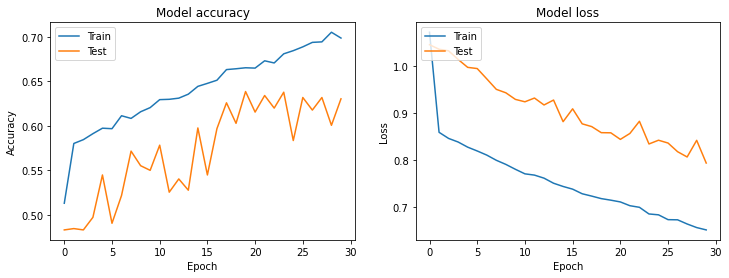

In [ ]:
model1=build_model_CNN1(64, 5, 0,4)
model1.summary()
tf.keras.utils.plot_model(model1, "model1.png", show_shapes = True)
history1=model1.fit(X_train, y_train, epochs=100,validation_data=(X_val,y_val),callbacks = callbacks)

output_metrics(model1,history1,X_test, y_test)
history_pickle=[]
history_pickle.append(history1)
import pickle
with open('history.pickle', 'wb') as f:
    pickle.dump([history_pickle], f)


Train on 5360 samples, validate on 1344 samples
Epoch 1/100
5360/5360 [==============================] - 22s 4ms/step - loss: 1.0478 - accuracy: 0.4812 - val_loss: 1.1394 - val_accuracy: 0.4851
Epoch 2/100
5360/5360 [==============================] - 20s 4ms/step - loss: 0.9069 - accuracy: 0.5599 - val_loss: 1.1108 - val_accuracy: 0.4829
Epoch 3/100
5360/5360 [==============================] - 20s 4ms/step - loss: 0.8857 - accuracy: 0.5771 - val_loss: 1.0794 - val_accuracy: 0.4829
Epoch 4/100
5360/5360 [==============================] - 21s 4ms/step - loss: 0.8689 - accuracy: 0.5819 - val_loss: 1.0445 - val_accuracy: 0.5015
Epoch 5/100
5360/5360 [==============================] - 20s 4ms/step - loss: 0.8519 - accuracy: 0.5950 - val_loss: 1.0134 - val_accuracy: 0.5238
Epoch 6/100
5360/5360 [==============================] - 20s 4ms/step - loss: 0.8383 - accuracy: 0.5905 - val_loss: 0.9986 - val_accuracy: 0.4963
Epoch 7/100
5360/5360 [==============================] - 20s 4ms/step - loss

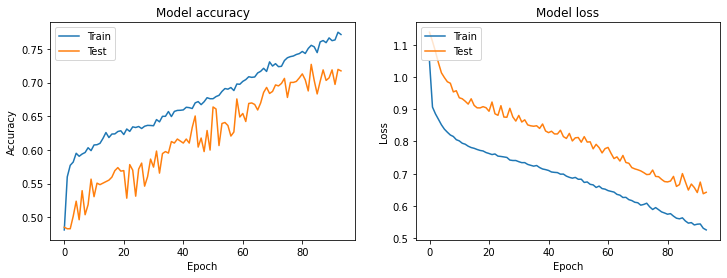

In [ ]:
model2=build_model_CNN1(64, 3, 0.5, 4)
history2=model2.fit(X_train, y_train, epochs=100,validation_data=(X_val,y_val),callbacks = callbacks)
model2.summary()

output_metrics(model2,history2,X_test, y_test)
tf.keras.utils.plot_model(model2, "model2.png", show_shapes = True)
history_pickle.append(history2)
with open('history.pickle', 'wb') as f:
    pickle.dump([history_pickle], f)

Train on 5360 samples, validate on 1344 samples
Epoch 1/100
5360/5360 [==============================] - 45s 8ms/step - loss: 0.9668 - accuracy: 0.5647 - val_loss: 1.0360 - val_accuracy: 0.4888
Epoch 2/100
5360/5360 [==============================] - 43s 8ms/step - loss: 0.8662 - accuracy: 0.5735 - val_loss: 1.0149 - val_accuracy: 0.4940
Epoch 3/100
5360/5360 [==============================] - 43s 8ms/step - loss: 0.8393 - accuracy: 0.5909 - val_loss: 0.9851 - val_accuracy: 0.4926
Epoch 4/100
5360/5360 [==============================] - 43s 8ms/step - loss: 0.8289 - accuracy: 0.5897 - val_loss: 0.9841 - val_accuracy: 0.5260
Epoch 5/100
5360/5360 [==============================] - 43s 8ms/step - loss: 0.8226 - accuracy: 0.5927 - val_loss: 0.9446 - val_accuracy: 0.5365
Epoch 6/100
5360/5360 [==============================] - 43s 8ms/step - loss: 0.8100 - accuracy: 0.6073 - val_loss: 0.9425 - val_accuracy: 0.5387
Epoch 7/100
5360/5360 [==============================] - 43s 8ms/step - loss

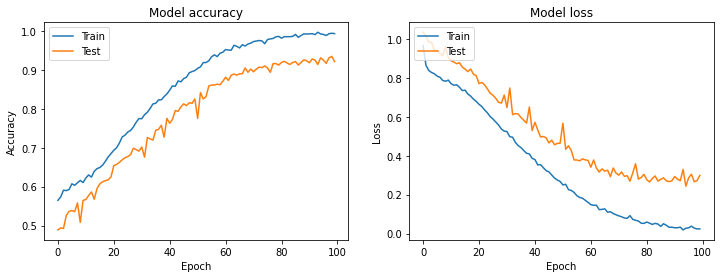

In [ ]:
model5=build_model_CNN3(4)
history5=model5.fit(X_train, y_train, epochs=100,validation_data=(X_val,y_val),callbacks = callbacks)
model5.summary()

output_metrics(model5,history5,X_test, y_test)

tf.keras.utils.plot_model(model5, "model5.png", show_shapes = True)


history_pickle.append(history5)
with open('history.pickle', 'wb') as f:
    pickle.dump([history_pickle], f)

Train on 5360 samples, validate on 1344 samples
Epoch 1/100
5360/5360 [==============================] - 41s 8ms/step - loss: 1.0206 - accuracy: 0.5752 - val_loss: 1.0422 - val_accuracy: 0.4829
Epoch 2/100
5360/5360 [==============================] - 37s 7ms/step - loss: 0.8483 - accuracy: 0.5813 - val_loss: 1.0398 - val_accuracy: 0.4829
Epoch 3/100
5360/5360 [==============================] - 37s 7ms/step - loss: 0.8325 - accuracy: 0.5860 - val_loss: 0.9913 - val_accuracy: 0.5365
Epoch 4/100
5360/5360 [==============================] - 37s 7ms/step - loss: 0.8137 - accuracy: 0.5966 - val_loss: 0.9597 - val_accuracy: 0.5275
Epoch 5/100
5360/5360 [==============================] - 37s 7ms/step - loss: 0.8009 - accuracy: 0.6034 - val_loss: 0.9537 - val_accuracy: 0.5037
Epoch 6/100
5360/5360 [==============================] - 37s 7ms/step - loss: 0.7943 - accuracy: 0.6063 - val_loss: 0.9834 - val_accuracy: 0.5714
Epoch 7/100
5360/5360 [==============================] - 37s 7ms/step - loss

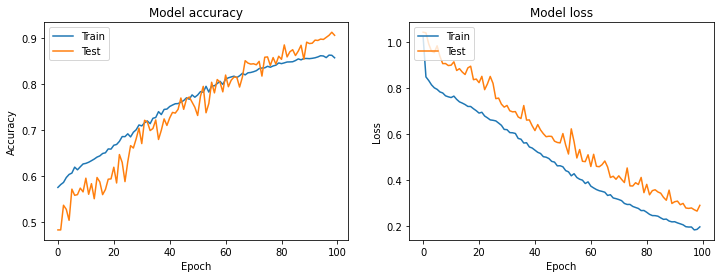

In [ ]:
model_CNN_API_2=build_model_CNN_API_2(4)
history_model_CNN_API_2=model_CNN_API_2.fit(X_train, y_train, epochs=100,validation_data=(X_val,y_val),callbacks = callbacks)

model_CNN_API_2.summary()
output_metrics(model_CNN_API_2,history_model_CNN_API_2,X_test, y_test)
tf.keras.utils.plot_model(model_CNN_API_2, "model_CNN_API_2.png", show_shapes = True)

history_pickle.append(history_model_CNN_API_2)
with open('history.pickle', 'wb') as f:
    pickle.dump([history_pickle], f)